In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file.
file_path = ("C:\\Users\\choud\\Downloads\\project gba 2 ethereum.xlsx")

# Read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to verify the import.
print(df.head(5))

                                               image  \
0  https://images.cointelegraph.com/cdn-cgi/image...   
1  https://www.tbstat.com/wp/uploads/2024/10/2024...   
2  https://s.yimg.com/ny/api/res/1.2/WZ9BEF9gW98V...   
3  https://media.zenfs.com/en/simply_wall_st__316...   
4  https://static.news.bitcoin.com/wp-content/upl...   

                                               title            source  \
0  Low-risk DeFi could do for Ethereum what searc...     Cointelegraph   
1  Low-risk DeFi, not memecoins, can best sustain...       theblock.co   
2  Memecoins can’t be Ethereum’s flagship for rev...     Yahoo Finance   
3  Bitmine Immersion Technologies (BMNR): Assessi...     Yahoo Finance   
4  Ethereum Futures Stack Up; Options Flow Eyes $...  Bitcoin.com News   

                   sourceUrl               publishedAt  \
0  https://cointelegraph.com  2025-09-21T04:16:57.000Z   
1    https://www.theblock.co  2025-09-21T19:28:40.000Z   
2  https://finance.yahoo.com  2025-09-21T17:

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Run these lines once to download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your dataframe and 'text' is the colomn you're working with

# 1. Remove missing rows
df_processed = df.dropna(subset=['title']).copy()

# 2. Tokenize it
df_processed['title_tokenized'] = df_processed['title'].apply(lambda x: word_tokenize(str(x)))

# 3. Make every text lowercase
df_processed['title_lower'] = df_processed['title'].str.lower()

# 4. Remove special characters
df_processed['title_no_special_chars'] = df_processed['title_lower'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df_processed['title_tokenized_no_special'] = df_processed['title_no_special_chars'].apply(lambda x: word_tokenize(x))
df_processed['title_no_stopwords'] = df_processed['title_tokenized_no_special'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the head of the DataFrame with the new columns
print(df_processed[['title', 'title_tokenized', 'title_lower', 'title_no_special_chars', 'title_no_stopwords']].head())
print(df.head())

                                               title  \
0  Low-risk DeFi could do for Ethereum what searc...   
1  Low-risk DeFi, not memecoins, can best sustain...   
2  Memecoins can’t be Ethereum’s flagship for rev...   
3  Bitmine Immersion Technologies (BMNR): Assessi...   
4  Ethereum Futures Stack Up; Options Flow Eyes $...   

                                     title_tokenized  \
0  [Low-risk, DeFi, could, do, for, Ethereum, wha...   
1  [Low-risk, DeFi, ,, not, memecoins, ,, can, be...   
2  [Memecoins, can, ’, t, be, Ethereum, ’, s, fla...   
3  [Bitmine, Immersion, Technologies, (, BMNR, ),...   
4  [Ethereum, Futures, Stack, Up, ;, Options, Flo...   

                                         title_lower  \
0  low-risk defi could do for ethereum what searc...   
1  low-risk defi, not memecoins, can best sustain...   
2  memecoins can’t be ethereum’s flagship for rev...   
3  bitmine immersion technologies (bmnr): assessi...   
4  ethereum futures stack up; options flow eye

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\choud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\choud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Define the name for the new Excel file
output_file_path = 'processed_ethe_data.xlsx'

# Save the processed DataFrame to a new Excel file.
# index=False ensures that the pandas index is not saved as a separate column.
df_processed.to_excel(output_file_path, index=False)

print(f"Successfully saved the updated DataFrame to {output_file_path}")

Successfully saved the updated DataFrame to processed_ethe_data.xlsx


In [6]:
from textblob import TextBlob

# --- Step 1: Load the preprocessed Excel file ---
preprocessed_file = 'processed_ethe_data.xlsx'
df = pd.read_excel(preprocessed_file)

# TextBlob works on strings, but the 'no_stopwords' column is a list of words.
# We need to convert it back to a string first.
# Example: ['first', 'text', 'great'] -> "first text great"
# The .apply() method with a lambda function is perfect for this.
df['cleaned_title_for_sentiment'] = df['title_no_stopwords'].apply(lambda tokens: ' '.join(eval(tokens)) if isinstance(tokens, str) else ' '.join(tokens))


# --- Step 2: Perform Sentiment Analysis ---

# Function to calculate polarity (sentiment score)
def get_sentiment_score(text):
  return TextBlob(text).sentiment.polarity

# Function to categorize sentiment based on polarity
def get_sentiment_category(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

# Create the 'sentiment_score' column by applying the function
df['sentiment_score'] = df['cleaned_title_for_sentiment'].apply(get_sentiment_score)

# Create the 'sentiment_category' column by applying the function
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)


# --- Step 3: Display the results and save to a new Excel file ---

print("DataFrame with Sentiment Analysis results:")
# Display all columns to verify the result
print(df[['title', 'cleaned_title_for_sentiment', 'sentiment_score', 'sentiment_category']].to_string())

# Define the name for the final output file
output_filename = 'processed_ethe_data.xlsx'

# Save the final DataFrame to the new Excel file
df.to_excel(output_filename, index=False)

print(f"\nSuccessfully saved the data with sentiment analysis to '{output_filename}'")

DataFrame with Sentiment Analysis results:
                                                                                                                                                                                                                                                     title                                                                                                                                                                                                     cleaned_title_for_sentiment  sentiment_score sentiment_category
0                                                                                                                                                                             Low-risk DeFi could do for Ethereum what search did for Google, Vitalik says                                                                                                                                                                          lowrisk defi could ethereu

Counts of each sentiment category:
sentiment_category
Neutral     58
Positive    36
Negative     6
Name: count, dtype: int64




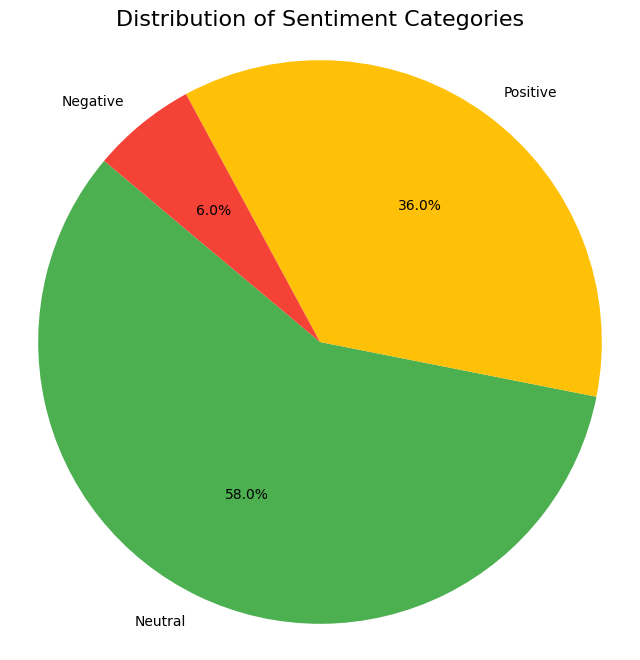

In [7]:

import matplotlib.pyplot as plt

# --- Step 1: Load the data from the Excel file ---
file_to_plot = 'processed_ethe_data.xlsx'
df = pd.read_excel(file_to_plot)

# --- Step 2: Count the values in the 'sentiment_category' column ---
# .value_counts() is a convenient pandas method that counts the occurrences of each unique item.
sentiment_counts = df['sentiment_category'].value_counts()

print("Counts of each sentiment category:")
print(sentiment_counts)
print("\n" + "="*50 + "\n")


# --- Step 3: Plot the pie chart ---

# Create the plot
plt.figure(figsize=(8, 8)) # Sets the figure size for better readability
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%', # Adds the percentage label to one decimal place
        startangle=140,      # Rotates the chart for better aesthetics
        colors=['#4CAF50', '#FFC107', '#F44336']) # Optional: custom colors (Green, Amber, Red)

# Add a title to the chart
plt.title('Distribution of Sentiment Categories', fontsize=16)

# Ensure the pie chart is a circle
plt.axis('equal')

# Display the chart
plt.show()

In [9]:

import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Load the data and prepare the text column ---
file_path = 'processed_ethe_data.xlsx'
df = pd.read_excel(file_path)

# Safely convert the string representation of lists in 'text_no_stopwords' back to actual lists
# We use a helper function with error handling
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return [] # Return empty list if cell is empty or malformed

df['tokens'] = df['title_no_stopwords'].apply(safe_literal_eval)

# The vectorizer needs sentences (strings), not lists of words.
# We join the tokens back into a single string for each document.
df['cleaned_title'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))


# --- Step 2: Vectorize the text using TF-IDF ---
# TF-IDF helps to highlight words that are more important to a document.
# We will ignore words that appear in less than 2 documents or in more than 95% of documents.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data to a document-term matrix
tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names_out()


# --- Step 3: Apply NMF for Topic Modeling ---
num_topics = 5

# Create and fit the NMF model
nmf_model = NMF(n_components=num_topics,
                random_state=42,       # For reproducible results
                beta_loss='kullback-leibler',
                solver='mu',
                max_iter=1000,
                alpha_W=0.00005,
                alpha_H=0.00005,
                l1_ratio=.5)

nmf_model.fit(tfidf_matrix)


# --- Step 4: Display the Topics ---
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # Print the topic number
        print(f"Topic #{topic_idx + 1}:")
        # Print the top words for that topic
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 50)

# Define how many top words you want to see for each topic
num_top_words = 10

print("Discovered Topics using NMF:")
display_topics(nmf_model, feature_names, num_top_words)

Discovered Topics using NMF:
Topic #1:
crypto buy best ethereum bitcoin vs eth means upgrade better
--------------------------------------------------
Topic #2:
ethereums defi vitalik lowrisk buterin google search growth future says
--------------------------------------------------
Topic #3:
price eth prediction ethereum analysis target 5000 ripple remittix sentiment
--------------------------------------------------
Topic #4:
bitcoin ethereum new hits highs xrp cut rate high btc
--------------------------------------------------
Topic #5:
ethereum 2025 presale treasury surge options gamble token retire millionaire
--------------------------------------------------


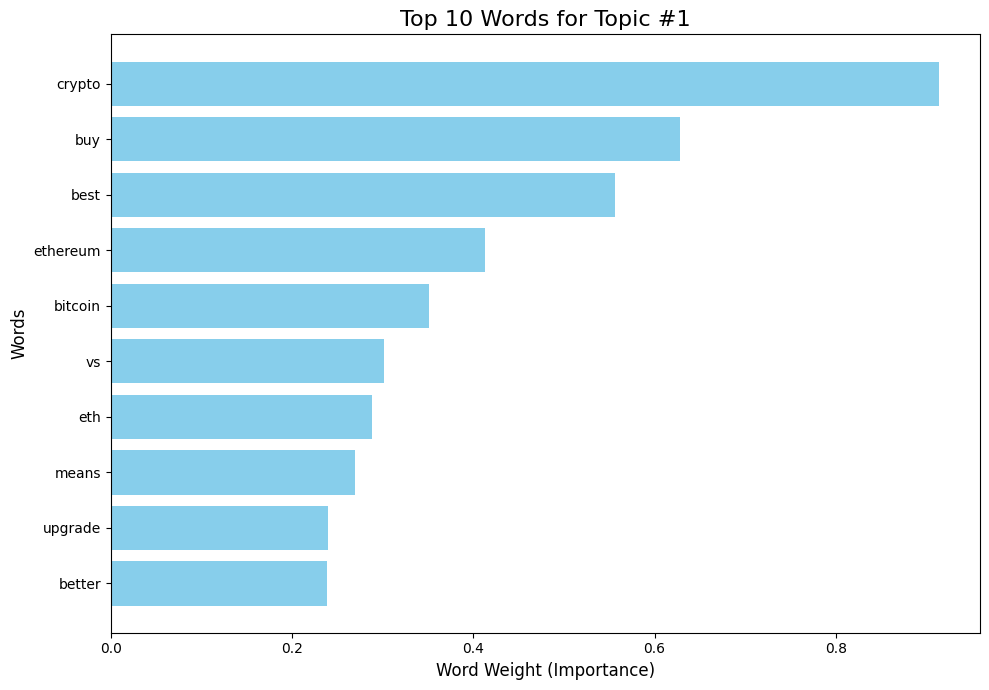

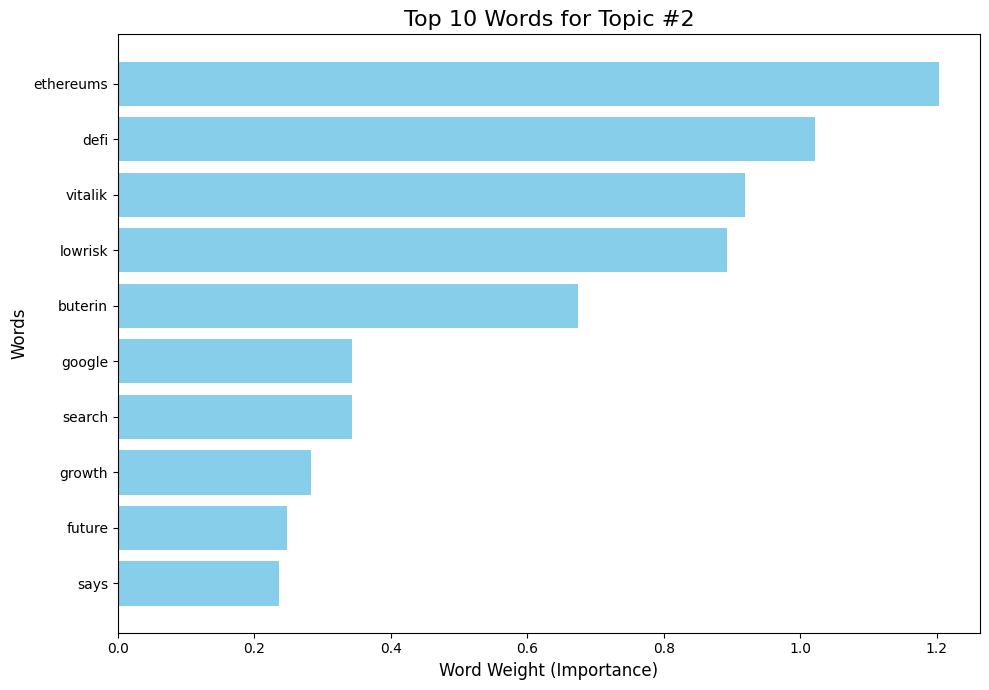

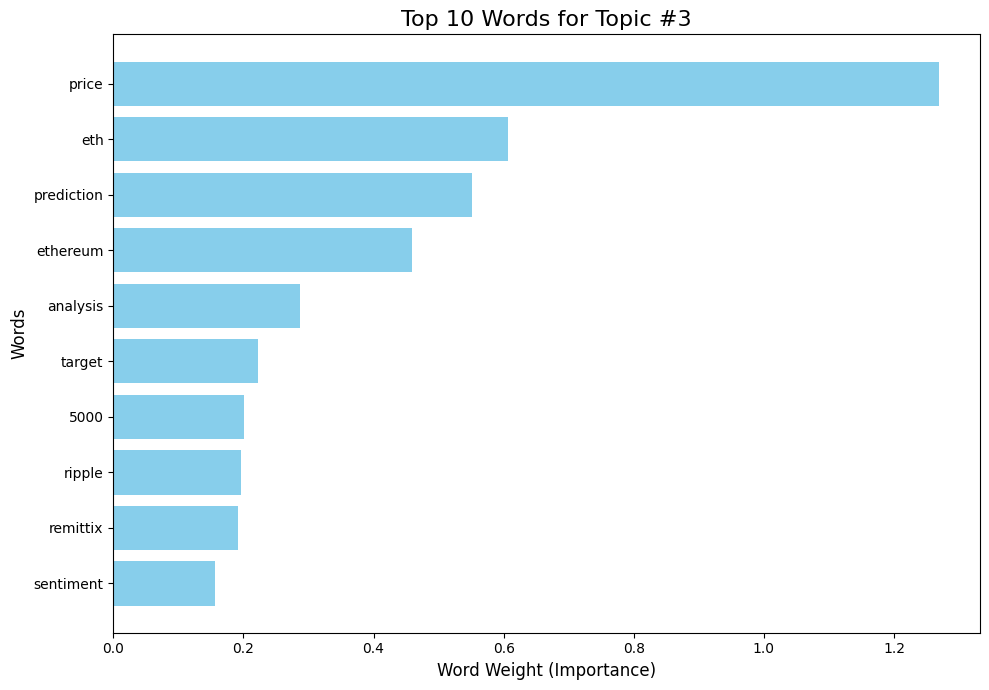

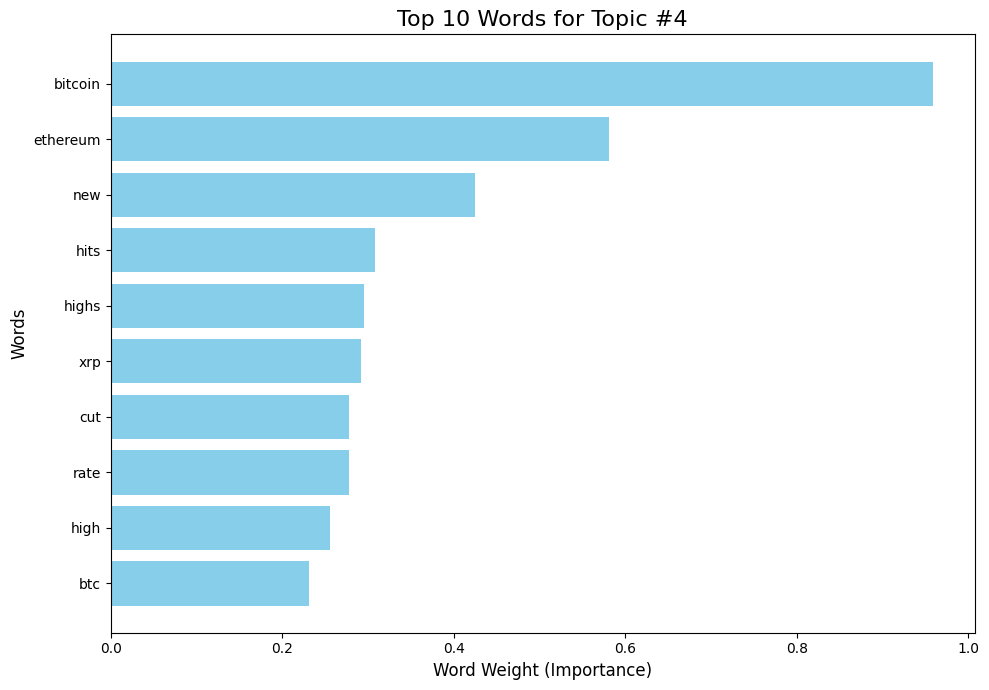

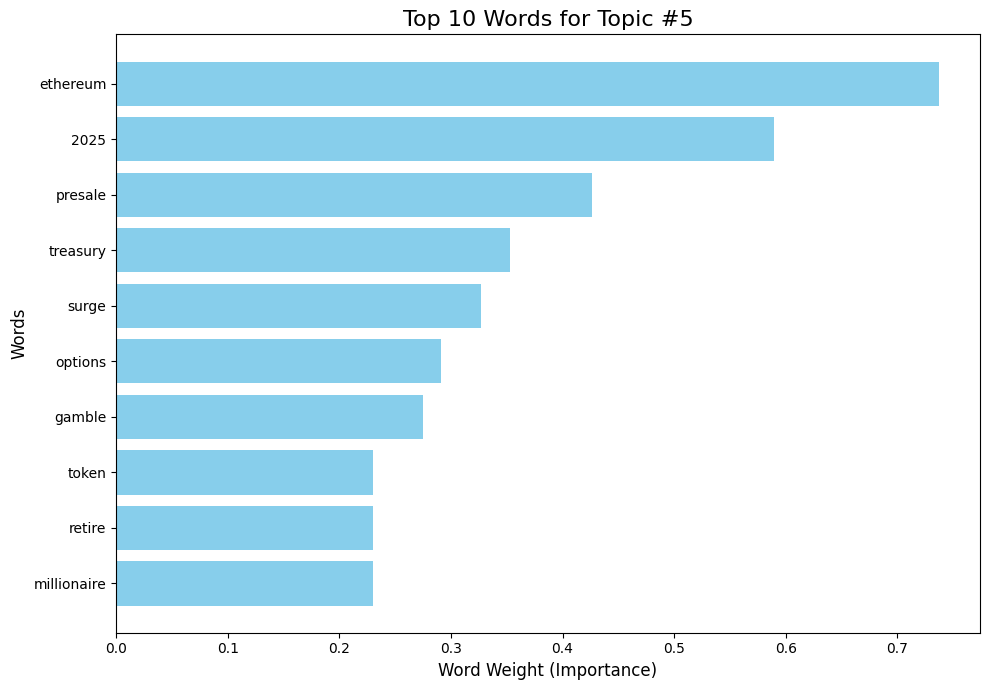

In [10]:
import matplotlib.pyplot as plt
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Setup - Load Data and Re-run NMF model ---
# This part ensures the model and data are loaded for the plotting step.
file_path = 'processed_ethe_data.xlsx'
df = pd.read_excel(file_path)

# Safely convert the string representation of lists back to actual lists
def safe_literal_eval(val):
    try: return ast.literal_eval(val)
    except (ValueError, SyntaxError): return []

df['tokens'] = df['title_no_stopwords'].apply(safe_literal_eval)
df['cleaned_title'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])
feature_names = vectorizer.get_feature_names_out()

# Apply NMF for Topic Modeling
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42, beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha_W=0.00005, alpha_H=0.00005, l1_ratio=.5)
nmf_model.fit(tfidf_matrix)


# --- Step 2: Create a Bar Chart for Each Topic ---

# Define how many top words you want to display in each chart
num_top_words = 10

# Loop through each topic in the NMF model's components
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top N words and their weights for the current topic
    # `topic.argsort()` sorts the word indices by weight in ascending order
    # `[:-num_top_words - 1:-1]` slices the last N items and reverses them to get descending order
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]

    # Get the actual words and their corresponding weights
    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = topic[top_word_indices]

    # --- Plotting the bar chart ---
    plt.figure(figsize=(10, 7)) # Set the figure size

    # Create a horizontal bar chart for better readability of word labels
    plt.barh(top_words, top_weights, color='skyblue')

    # Invert the y-axis to have the most important word at the top
    plt.gca().invert_yaxis()

    # Add a title and labels
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.xlabel('Word Weight (Importance)', fontsize=12)
    plt.ylabel('Words', fontsize=12)

    # Ensure the layout is clean
    plt.tight_layout()

    # Display the plot for the current topic
    plt.show()

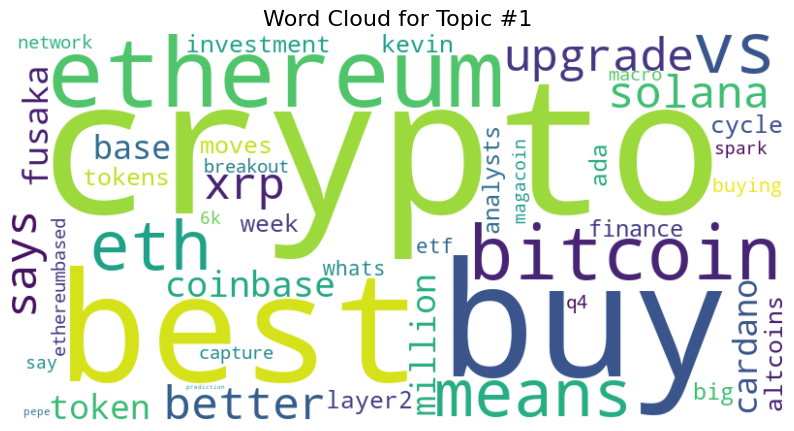

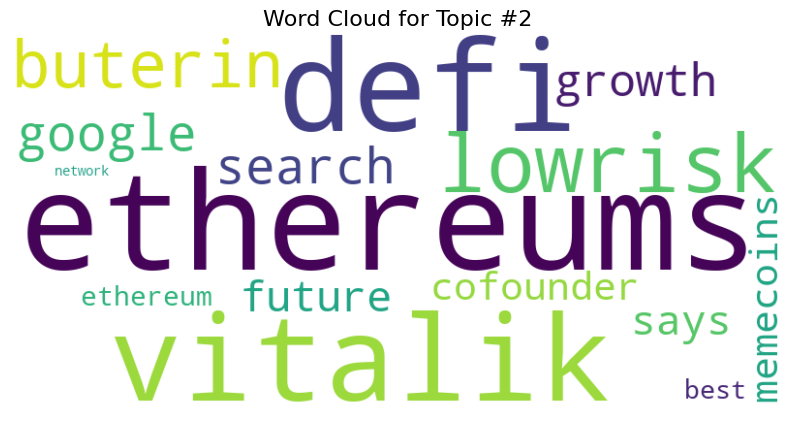

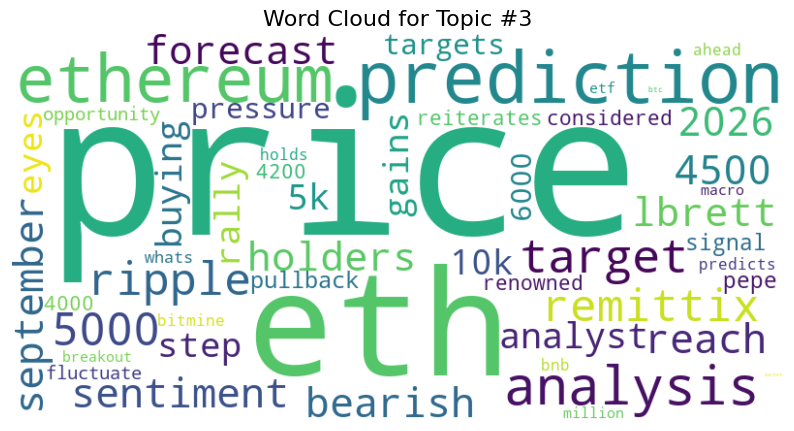

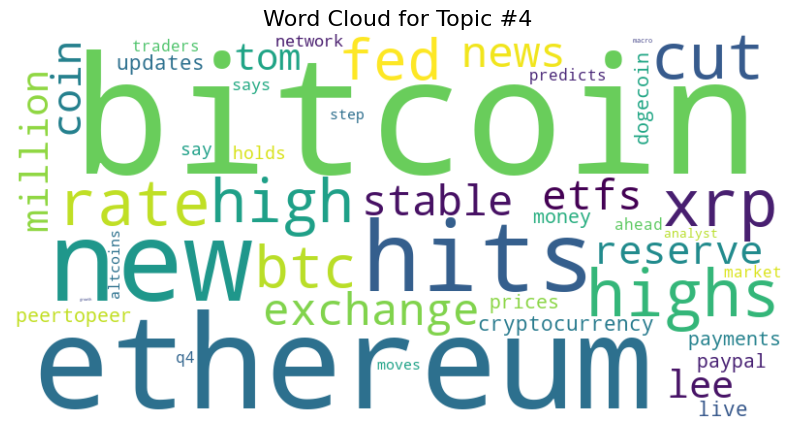

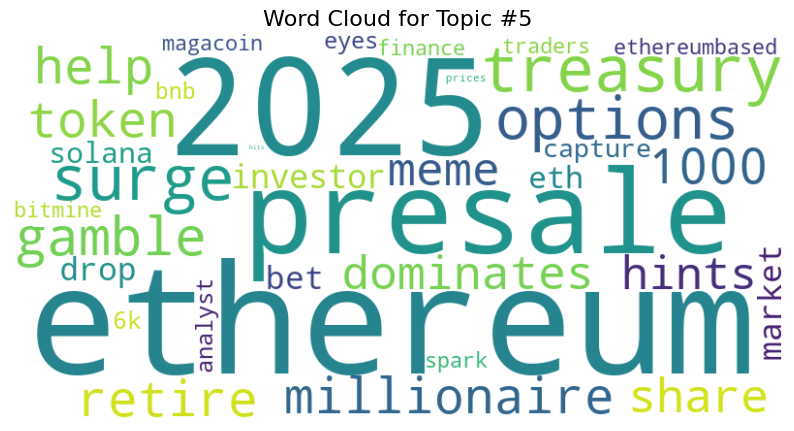

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Step 1: Setup - Load Data and Re-run NMF model ---
# This part ensures the model and data are loaded for the plotting step.
file_path = 'processed_ethe_data.xlsx'
df = pd.read_excel(file_path)

# Safely convert the string representation of lists back to actual lists
def safe_literal_eval(val):
    try: return ast.literal_eval(val)
    except (ValueError, SyntaxError): return []

df['tokens'] = df['title_no_stopwords'].apply(safe_literal_eval)
df['cleaned_title'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_title'])
feature_names = vectorizer.get_feature_names_out()

# Apply NMF for Topic Modeling
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42, beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha_W=0.00005, alpha_H=0.00005, l1_ratio=.5)
nmf_model.fit(tfidf_matrix)


# --- Step 2: Generate and Plot a Word Cloud for Each Topic ---

# Loop through each topic in the NMF model's components
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    # This is needed for the word cloud generator
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object with desired parameters
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white',
                          colormap='viridis').generate_from_frequencies(topic_words)

    # --- Plotting the Word Cloud ---
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Hide the axes
    plt.show()

In [13]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from collections import Counter
import ast # To safely evaluate string representations of lists

# Load the Excel file with the preprocessed text
file_path = 'processed_ethe_data.xlsx'
df_ngrams = pd.read_excel(file_path)

# --- Step 1: Create a single list of all words from the 'text_no_stopwords' column ---

# The column might contain string representations of lists, so we use ast.literal_eval for safe conversion.
# We then flatten the list of lists into a single list of words.
all_words = [word for sublist in df_ngrams['title_no_stopwords'].apply(ast.literal_eval) for word in sublist]


# --- Step 2: Calculate Bigram Frequencies ---

# Create bigrams
bigrams = list(nltk.bigrams(all_words))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

print("--- Top 20 Most Common Bigrams ---")
# .most_common(20) returns a list of (bigram, count) tuples
for bigram, count in bigram_counts.most_common(20):
    print(f"{' '.join(bigram)}: {count}")


# --- Step 3: Calculate Trigram Frequencies ---

# Create trigrams
trigrams = list(nltk.trigrams(all_words))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

print("\n--- Top 20 Most Common Trigrams ---")
# .most_common(20) returns a list of (trigram, count) tuples
for trigram, count in trigram_counts.most_common(20):
    print(f"{' '.join(trigram)}: {count}")

--- Top 20 Most Common Bigrams ---
bitcoin ethereum: 19
ethereum price: 14
price prediction: 12
lowrisk defi: 10
eth price: 8
vitalik buterin: 7
crypto buy: 6
defi could: 4
new highs: 4
best crypto: 4
rate cut: 4
fed rate: 3
prediction eth: 3
cofounder vitalik: 2
buterin lowrisk: 2
better crypto: 2
buy bitcoin: 2
bitcoin vs: 2
vs ethereum: 2
ethereum ethereum: 2

--- Top 20 Most Common Trigrams ---
ethereum price prediction: 6
lowrisk defi could: 4
fed rate cut: 3
price prediction eth: 3
best crypto buy: 3
cofounder vitalik buterin: 2
vitalik buterin lowrisk: 2
buterin lowrisk defi: 2
better crypto buy: 2
bitcoin vs ethereum: 2
ethereum could help: 2
could help retire: 2
help retire millionaire: 2
ethereum eth price: 2
eth price prediction: 2
ethereum price analysis: 2
cryptocurrency news live: 2
news live bitcoin: 2
live bitcoin ethereum: 2
price prediction bitcoin: 2
